<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


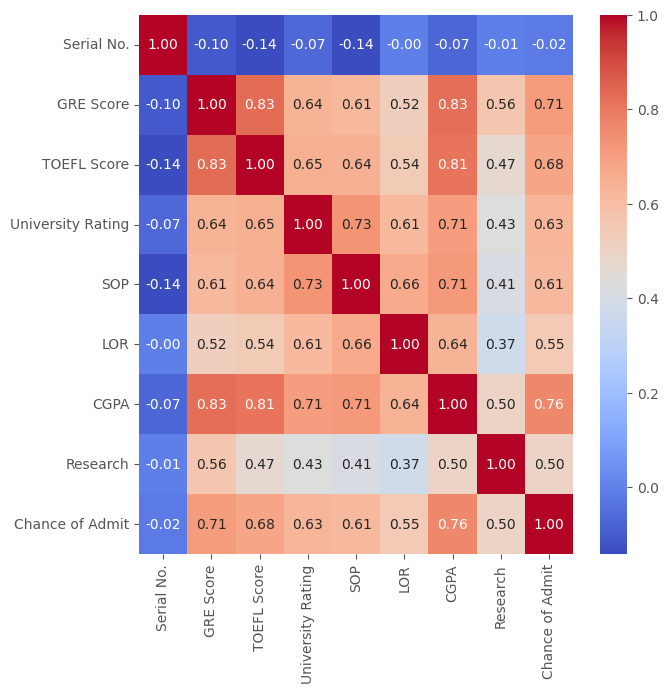

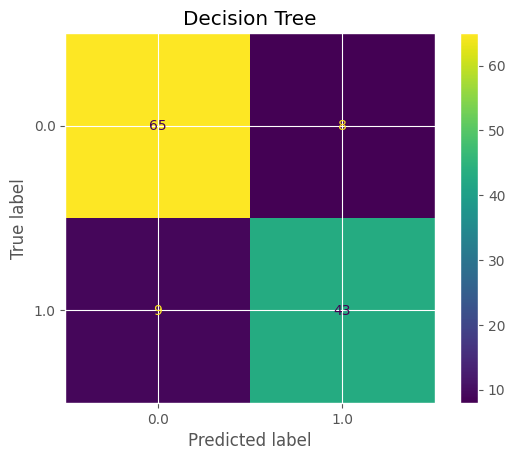

Accuracy is:
0.864
              precision    recall  f1-score   support

         0.0       0.88      0.89      0.88        73
         1.0       0.84      0.83      0.83        52

    accuracy                           0.86       125
   macro avg       0.86      0.86      0.86       125
weighted avg       0.86      0.86      0.86       125



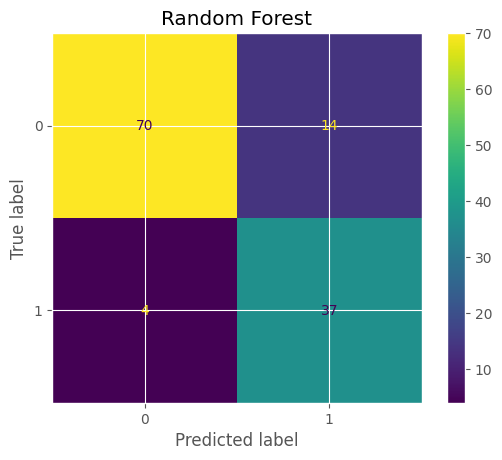

Accuracy is:
0.856
              precision    recall  f1-score   support

           0       0.95      0.83      0.89        84
           1       0.73      0.90      0.80        41

    accuracy                           0.86       125
   macro avg       0.84      0.87      0.85       125
weighted avg       0.87      0.86      0.86       125



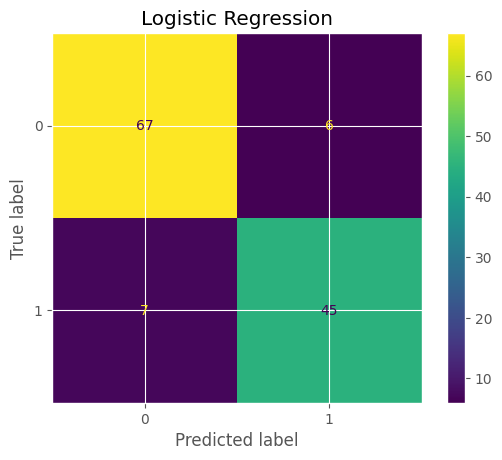

Accuracy is:
0.896


In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/content/LAB 2 DATASET - LAB 2 DATASET.csv')
data.info()
data['Chance of Admit'] = [1 if each > 0.75  else 0 for each in data['Chance of Admit']]
x=data[['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research']]
y=data[['Chance of Admit']]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=1)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
model_dr = DecisionTreeRegressor(random_state=1)
model_rf = RandomForestRegressor(random_state=1)
model_lr = LogisticRegression(random_state=1,solver = 'lbfgs',max_iter=1000)
model_dr.fit(x_train,y_train)
model_rf.fit(x_train,y_train)
model_lr.fit(x_train,y_train)
y_pred_dr=model_dr.predict(x_test)
y_pred_rf=model_rf.predict(x_test)
y_pred_lr=model_lr.predict(x_test)
y_pred_rf = [1 if each > 0.75 else 0 for each in y_pred_rf]
from sklearn.metrics import ConfusionMatrixDisplay , accuracy_score , classification_report
corr=data.corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr,cmap='coolwarm',annot=True,fmt='.2f')
plt.show()
ConfusionMatrixDisplay.from_predictions(y_pred_dr,y_test)
plt.title("Decision Tree")
plt.show()
print("Accuracy is:")
print(accuracy_score(y_pred_dr,y_test))
print(classification_report(y_pred_dr,y_test))
ConfusionMatrixDisplay.from_predictions(y_pred_rf,y_test)
plt.title("Random Forest")
plt.show()
print("Accuracy is:")
print(accuracy_score(y_pred_rf,y_test))
print(classification_report(y_pred_rf,y_test))
ConfusionMatrixDisplay.from_predictions(y_pred_lr,y_test)
plt.title("Logistic Regression")
plt.show()
print("Accuracy is:")
print(accuracy_score(y_pred_lr,y_test))